In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df =pd.read_csv("breastcancer.csv")
df.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [29]:
df.isna().sum()

id                    0
name                  0
radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

In [30]:
#df['radius']=df['radius'].fillna(np.mean(df['radius'].dropna()))

In [31]:
df.head(10)
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
count,498.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.326635,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798,39.467487,0.372583
std,3.506881,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.027414,0.007060,13.604683,0.483918
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960,16.000000,0.000000
25%,11.817500,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700,27.000000,0.000000
50%,13.465000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540,40.000000,0.000000
75%,16.155000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120,52.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440,62.000000,1.000000


In [32]:
df['diagnosis'].astype(int)
df.dtypes

id                    object
name                  object
radius               float64
texture              float64
perimeter            float64
area                 float64
smoothness           float64
compactness          float64
concavity            float64
symmetry             float64
fractal_dimension    float64
age                    int64
diagnosis              int64
dtype: object

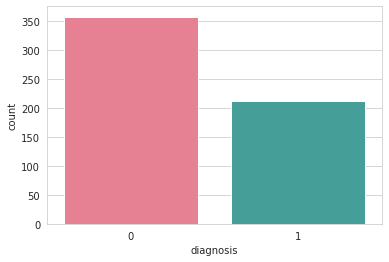

In [33]:
sns.set_style("whitegrid")
sns.countplot(data=df,x='diagnosis',palette='husl')

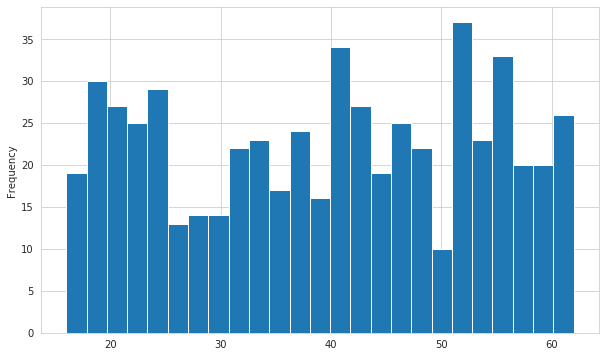

In [34]:
df['age'].plot.hist(bins=25,figsize=(10,6))

# Data Cleaning

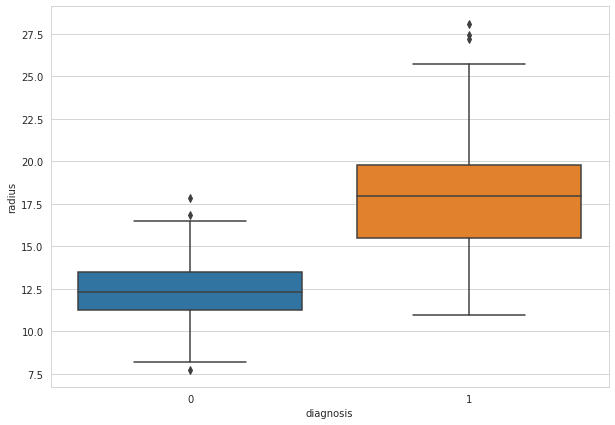

In [35]:
#visualising average radius of a tumor by diadnosis 
plt.figure(figsize=(10,7))
sns.boxplot(x='diagnosis',y='radius',data=df)

In [38]:
df.groupby('diagnosis')['radius'].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

In [39]:
def impute_radius(cols):
    radius=cols[0]
    diagnosis=cols[1]
    
    if pd.isnull(radius):
        if diagnosis ==1:
            return 17.896
        else:
            return 12.340
    else:
        return radius

In [40]:
df['radius']=df[['radius','diagnosis']].apply(impute_radius,axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             569 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [43]:
df.drop(['id','name'],axis=1,inplace=True)

In [44]:
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.896,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.896,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [45]:
x= df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [48]:
print(x.head())
y.head()

   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0  17.896    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1  20.570    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2  19.690    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3  17.896    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4  20.290    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  fractal_dimension  age  
0    0.2419            0.07871   35  
1    0.1812            0.05667   27  
2    0.2069            0.05999   31  
3    0.2597            0.09744   49  
4    0.1809            0.05883   20  


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg=LogisticRegression(solver="liblinear")

In [62]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=True)

In [63]:
print(x_train.head())
y_train.head()

     radius  texture  perimeter   area  smoothness  compactness  concavity  \
249   11.52    14.93      73.87  406.3     0.10130      0.07808   0.043280   
58    13.05    19.31      82.61  527.2     0.08060      0.03789   0.000692   
476   14.20    20.53      92.41  618.4     0.08931      0.11080   0.050630   
529   12.07    13.44      77.83  445.2     0.11000      0.09009   0.037810   
422   11.61    16.02      75.46  408.2     0.10880      0.11680   0.070970   

     symmetry  fractal_dimension  age  
249    0.1883            0.06168   52  
58     0.1819            0.05501   36  
476    0.1506            0.06009   19  
529    0.1657            0.06608   55  
422    0.1886            0.06320   44  


249    0
58     0
476    0
529    0
422    0
Name: diagnosis, dtype: int64

In [64]:
x_train.count()
x_test.count()

radius               171
texture              171
perimeter            171
area                 171
smoothness           171
compactness          171
concavity            171
symmetry             171
fractal_dimension    171
age                  171
dtype: int64

In [65]:
logreg.fit(x_train,y_train)
prediction = logreg.predict(x_test)

In [73]:
from sklearn.metrics import classification_report
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.91       108\n           1       0.88      0.79      0.83        63\n\n    accuracy                           0.88       171\n   macro avg       0.88      0.86      0.87       171\nweighted avg       0.88      0.88      0.88       171\n'

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[101,   7],
       [ 13,  50]])